In [258]:
import sympy as sp

In [259]:
t,r,theta,phi = sp.symbols('t r theta phi')   ## Cooridnates for 4D Minkowski space
coords = [t, r, theta, phi]

In [260]:
a,k = sp.symbols('a k')  ## Scale factor and Curvature

In [261]:
a = sp.Function('a')(t)  ## Scale factor is a function of time

In [262]:
##------Metric Tensor------#

In [263]:
g = sp.diag(1,-a**2/(1 - k*r**2), -a**2 * r**2, -a**2 * r**2 * sp.sin(theta)**2)  
g_inv = g.inv()   ## inverse metric tensor

In [264]:
g

⎡1      0           0              0        ⎤
⎢                                           ⎥
⎢      2                                    ⎥
⎢    -a (t)                                 ⎥
⎢0  ──────────      0              0        ⎥
⎢        2                                  ⎥
⎢   - k⋅r  + 1                              ⎥
⎢                                           ⎥
⎢                 2  2                      ⎥
⎢0      0       -r ⋅a (t)          0        ⎥
⎢                                           ⎥
⎢                            2  2       2   ⎥
⎣0      0           0      -r ⋅a (t)⋅sin (θ)⎦

In [265]:
g_inv

⎡1     0         0             0        ⎤
⎢                                       ⎥
⎢      2                                ⎥
⎢   k⋅r  - 1                            ⎥
⎢0  ────────     0             0        ⎥
⎢     2                                 ⎥
⎢    a (t)                              ⎥
⎢                                       ⎥
⎢               -1                      ⎥
⎢0     0      ────────         0        ⎥
⎢              2  2                     ⎥
⎢             r ⋅a (t)                  ⎥
⎢                                       ⎥
⎢                             -1        ⎥
⎢0     0         0      ────────────────⎥
⎢                        2  2       2   ⎥
⎣                       r ⋅a (t)⋅sin (θ)⎦

In [266]:
##------Christoffel Symbol-------##

$\Gamma^{\alpha}_{\mu \nu} = \frac{1}{2} g^{\alpha \lambda} (\partial_{\mu} g_{\nu \lambda} + \partial_{\nu} g_{\mu \lambda} - \partial_{\lambda} g_{\mu \nu})$

In [267]:
Gamma = sp.Symbol('Gamma')

Gamma = [sp.Matrix.zeros(4,4) for _ in range(4)]

In [268]:
for alpha in range(4):
    for mu in range(4):
        for nu in range(4):
            val = 0
            for lam in range(4):
                val += 1/2*g_inv[alpha,lam] * (sp.diff(g[nu,lam],coords[mu]) + sp.diff(g[mu,lam],coords[nu]) - sp.diff(g[mu,nu],coords[lam]))
                Gamma[alpha][mu,nu] = val

In [269]:
Gamma[0]

⎡0          0                   0                         0              ⎤
⎢                                                                        ⎥
⎢            d                                                           ⎥
⎢   1.0⋅a(t)⋅──(a(t))                                                    ⎥
⎢            dt                                                          ⎥
⎢0  ─────────────────           0                         0              ⎥
⎢           2                                                            ⎥
⎢      - k⋅r  + 1                                                        ⎥
⎢                                                                        ⎥
⎢                           2      d                                     ⎥
⎢0          0          1.0⋅r ⋅a(t)⋅──(a(t))               0              ⎥
⎢                                  dt                                    ⎥
⎢                                                                        ⎥
⎢                        

In [270]:
Gamma[1]

⎡                                ⎛   2    ⎞ d                                  ↪
⎢                           -1.0⋅⎝k⋅r  - 1⎠⋅──(a(t))                           ↪
⎢                                           dt                                 ↪
⎢            0              ─────────────────────────         0                ↪
⎢                               ⎛     2    ⎞                                   ↪
⎢                               ⎝- k⋅r  + 1⎠⋅a(t)                              ↪
⎢                                                                              ↪
⎢     ⎛   2    ⎞ d                                                             ↪
⎢-1.0⋅⎝k⋅r  - 1⎠⋅──(a(t))              ⎛   2    ⎞                              ↪
⎢                dt           -1.0⋅k⋅r⋅⎝k⋅r  - 1⎠                              ↪
⎢─────────────────────────    ────────────────────            0                ↪
⎢    ⎛     2    ⎞                            2                                 ↪
⎢    ⎝- k⋅r  + 1⎠⋅a(t)      

In [271]:
Gamma[2]

⎡                       d                           ⎤
⎢                   1.0⋅──(a(t))                    ⎥
⎢                       dt                          ⎥
⎢     0         0   ────────────          0         ⎥
⎢                       a(t)                        ⎥
⎢                                                   ⎥
⎢                       1.0                         ⎥
⎢     0         0       ───               0         ⎥
⎢                        r                          ⎥
⎢                                                   ⎥
⎢    d                                              ⎥
⎢1.0⋅──(a(t))                                       ⎥
⎢    dt        1.0                                  ⎥
⎢────────────  ───       0                0         ⎥
⎢    a(t)       r                                   ⎥
⎢                                                   ⎥
⎣     0         0        0        -1.0⋅sin(θ)⋅cos(θ)⎦

In [272]:
Gamma[3]

⎡                                   d       ⎤
⎢                               1.0⋅──(a(t))⎥
⎢                                   dt      ⎥
⎢     0         0       0       ────────────⎥
⎢                                   a(t)    ⎥
⎢                                           ⎥
⎢                                   1.0     ⎥
⎢     0         0       0           ───     ⎥
⎢                                    r      ⎥
⎢                                           ⎥
⎢                                1.0⋅cos(θ) ⎥
⎢     0         0       0        ────────── ⎥
⎢                                  sin(θ)   ⎥
⎢                                           ⎥
⎢    d                                      ⎥
⎢1.0⋅──(a(t))                               ⎥
⎢    dt        1.0  1.0⋅cos(θ)              ⎥
⎢────────────  ───  ──────────       0      ⎥
⎣    a(t)       r     sin(θ)                ⎦

In [273]:
##------Ricci Tensor------##

$R_{\mu\nu} = \partial_\lambda \Gamma^\lambda_{\mu\nu} - \partial_\nu \Gamma^\lambda_{\mu\lambda} + \Gamma^\lambda_{\lambda\rho} \Gamma^\rho_{\mu\nu} - \Gamma^\rho_{\mu\lambda} \Gamma^\lambda_{\nu\rho}$

In [274]:
R = sp.Matrix.zeros()

In [275]:
R

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [276]:
for mu in range(4):
    for nu in range(4):
        val = 0
        for lam in range(4):
            val += sp.diff(Gamma[lam][mu,nu],coords[lam])
            val -= sp.diff(Gamma[lam][mu,lam],coords[nu])
            for rho in range(4):
                val += Gamma[lam][lam,rho] * Gamma[rho][mu,nu]
                val -= Gamma[rho][mu,lam] * Gamma[lam][nu,rho]
        R[mu,nu] = val


In [277]:
Ricci = sp.simplify(R)

In [278]:
Ricci

⎡      2                                                                       ↪
⎢     d                                                                        ↪
⎢-3.0⋅───(a(t))                                                                ↪
⎢       2                                                                      ↪
⎢     dt                                                                       ↪
⎢───────────────                        0                                      ↪
⎢     a(t)                                                                     ↪
⎢                                                                              ↪
⎢                                    2                        2                ↪
⎢                                   d               ⎛d       ⎞                 ↪
⎢                 -2.0⋅k - 1.0⋅a(t)⋅───(a(t)) - 2.0⋅⎜──(a(t))⎟                 ↪
⎢                                     2             ⎝dt      ⎠                 ↪
⎢                           

In [279]:
##-----Ricci Scalar------##

In [280]:
Rs = 0
for mu in range(4):
    for nu in range(4):
      Rs += g_inv[mu,nu] * Ricci[mu,nu]  

In [281]:
R_scalar = sp.simplify(Rs)

In [166]:
print(R_scalar)

-(6.0*k + 6.0*a(t)*Derivative(a(t), (t, 2)) + 6.0*Derivative(a(t), t)**2)/a(t)**2


In [167]:
##------Einstein Tensor-------##

$G_{\mu\nu} = R_{\mu\nu} - \frac{1}{2} g_{\mu\nu} R$

In [168]:
G = sp.Matrix.zeros(4,4)

In [169]:
G

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [170]:
for mu in range(4):
    for nu in range(4):
        val = 0
        val += Ricci[mu,nu] - (1/2 * g[mu,nu] * Rs)
        G[mu,nu] = val

In [171]:
G_ein = G.applyfunc(sp.simplify)

In [172]:
G_ein

⎡    ⎛              2⎞                                                         ↪
⎢    ⎜    ⎛d       ⎞ ⎟                                                         ↪
⎢3.0⋅⎜k + ⎜──(a(t))⎟ ⎟                                                         ↪
⎢    ⎝    ⎝dt      ⎠ ⎠                                                         ↪
⎢─────────────────────                       0                                 ↪
⎢         2                                                                    ↪
⎢        a (t)                                                                 ↪
⎢                                                                              ↪
⎢                                         2                        2           ↪
⎢                                        d               ⎛d       ⎞            ↪
⎢                       1.0⋅k + 2.0⋅a(t)⋅───(a(t)) + 1.0⋅⎜──(a(t))⎟            ↪
⎢                                          2             ⎝dt      ⎠            ↪
⎢                           

In [173]:
##-----Energy-Momentum Tensor------##

In [174]:
p,rho = sp.symbols('p rho')

In [175]:
T = sp.diag(rho,-p,-p,-p)

In [176]:
T

⎡ρ  0   0   0 ⎤
⎢             ⎥
⎢0  -p  0   0 ⎥
⎢             ⎥
⎢0  0   -p  0 ⎥
⎢             ⎥
⎣0  0   0   -p⎦

In [199]:
##------Friedmann Equation-----##

In [239]:
G_N = sp.Symbol('G_N')
kappa = 8 * sp.Symbol('pi') * G_N

In [240]:
dot_a = sp.diff(a,t)
ddot_a = sp.diff(a,t,2)

In [241]:
eq1 = sp.Eq(G_ein[0,0], kappa * T[0,0])

In [242]:
dot_a_sq_solved = sp.solve(eq1, dot_a**2)[0]

In [243]:
H_sq = dot_a_sq_solved / a**2

In [244]:
H_final = sp.simplify(H_sq)

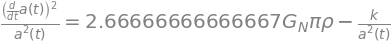

In [245]:
Eqn1 = sp.Eq((dot_a/a)**2,H_final)
Eqn1

In [247]:
k_plus_adot2 = sp.solve(eq1, k + dot_a**2)[0]

In [248]:
eq2 = sp.Eq(k + dot_a**2 + 2*a*ddot_a, -kappa*p*a**2)

In [249]:
eq2_subs = eq2.subs(k + dot_a**2, k_plus_adot2)

In [250]:
accel_eq = sp.solve(eq2_subs, ddot_a)[0] / a

In [251]:
accel_eq = sp.simplify(accel_eq)

In [253]:
Acc_eq = sp.Eq(ddot_a/a, accel_eq)

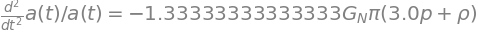

In [254]:
Acc_eq